# Plot result from RL evaluation during training

In [ ]:
import numpy as np

In [27]:
path_to_files = [
    "logs_ppo_cnn_rlzoo_hp/Iteration1/eval_log/evaluations.npz",
    "logs_ppo_cnn_rlzoo_hp/Iteration2/eval_log/evaluations.npz",
    "logs_ppo_cnn_rlzoo_hp/Iteration3/eval_log/evaluations.npz",
    "logs_ppo_cnn_rlzoo_hp/Iteration4/eval_log/evaluations.npz",
    "logs_ppo_cnn_rlzoo_hp/Iteration5/eval_log/evaluations.npz"
]

In [15]:
data  = np.load(path_to_files[0])
data['results'].shape # (nombre de timesteps, nb d'evaluation par timesteps)
data['results'].mean(axis=1)
data['timesteps'].shape

(151,)

In [32]:


data_full = []
max_length = 0  # Initialize variable to store maximum length

# Iterate over each file in path_to_files
for file in path_to_files:
    data = np.load(file)
    eval_rewards = data['results'].mean(axis=1)
    data_full.append(eval_rewards)
    max_length = max(max_length, len(eval_rewards))  # Update max_length

# Pad sequences to make them homogeneous
padded_data_full = []
for seq in data_full:
    padded_seq = np.pad(seq, (0, max_length - len(seq)), mode='constant')
    padded_data_full.append(padded_seq)

# Convert padded_data_full into a NumPy array
data_full_array = np.array(padded_data_full)

In [35]:
mean = data_full_array.mean(axis = 0)
std =  data_full_array.std(axis = 0)

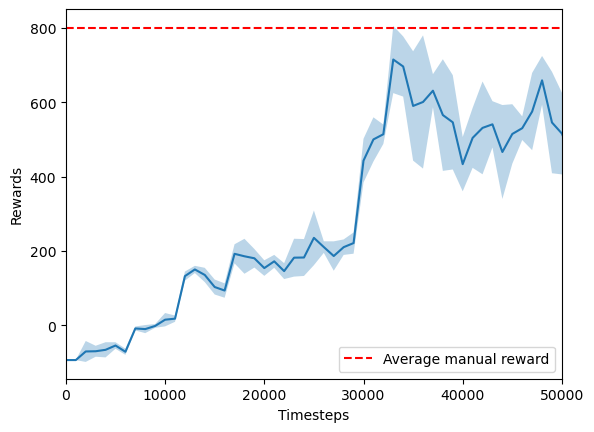

In [46]:
from matplotlib import pyplot as plt

# Generate x-axis values based on the length of mean
x_values = np.arange(len(mean))*1000

# Plot mean
plt.plot(x_values, mean)

# Shade the area between mean plus std and mean minus std
plt.fill_between(x_values, mean + std, mean - std, alpha=0.3)
plt.axhline(y=800, color='r', linestyle='--', label='Average manual reward')

# Add labels and legend
plt.xlabel('Timesteps')
plt.ylabel('Rewards')
plt.legend()
plt.xlim(0, 50000)
# Show plot
plt.show()